# 4.4 正则化

* 过拟合：神经网络模型在训练数据集上的准确率较高，在新的数据进行预测或分类时准确率较
低，说明模型的泛化能力差。 
* 正则化：在损失函数中给每个参数 w 加上权重，引入模型复杂度指标，从而抑制模型噪声，减小
过拟合。

* 使用正则化后，损失函数 loss 变为两项之和：
```
loss = loss(y 与 y_) + REGULARIZER*loss(w)
```
其中，
    * 第一项是预测结果与标准答案之间的差距，如之前讲过的交叉熵、均方误差等；
    * 第二项是正则化计算结果。
* 正则化计算方法
    * L1 正则化： 𝒍𝒐𝒔𝒔𝑳𝟏 = ∑𝒊𝒘𝒊,用Tesnsorflow 函数表示:
    ```
    loss(w) =tf.contrib.layers.l1_regularizer(REGULARIZER)(w)
    ```
    L2 正则化： 𝒍𝒐𝒔𝒔𝑳𝟐 = ∑𝒊|𝒘𝒊|^𝟐,用 Tesnsorflow 函数表示:
    ```
    loss(w) = tf.contrib.layers.l2_regularizer(REGULARIZER)(w)
    ```
* 用 Tesnsorflow 函数实现正则化：
tf.add_to_collection('losses',tf.contrib.layers.l2_regularizer(regularizer)(w)
loss = cem + tf.add_n(tf.get_collection('losses'))
cem 的计算已在 4.1 节中给出。 

In [5]:
# coding:utf-8
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
# 0导入模块 ，生成模拟数据集
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

BATCH_SIZE = 30    # 一次喂入的数据量
seed = 2
# 基于seed产生随机数
rdm = np.random.RandomState(seed)
# 随机数返回300行2列的矩阵，表示300组坐标点（x0,x1）作为输入数据集
X = rdm.randn(300, 2)
# 从X这个300行2列的矩阵中取出一行,判断如果两个坐标的平方和小于2，给Y赋值1，其余赋值0
# 作为输入数据集的标签（正确答案）
Y_ = [int(x0 * x0 + x1 * x1 < 2) for (x0, x1) in X]
# 遍历Y中的每个元素，1赋值'red'其余赋值'blue'，这样可视化显示时人可以直观区分
Y_c = [['red' if y else 'blue'] for y in Y_]
# 对数据集X和标签Y进行shape整理，第一个元素为-1表示，随第二个参数计算得到，第二个元素表示多少列，把X整理为n行2列，
# 把Y整理为n行1列
X = np.vstack(X).reshape(-1, 2)
Y_ = np.vstack(Y_).reshape(-1, 1)
print("X:\n",X)
print("Y_:\n",Y_)
print("Y_c:\n",Y_c)

X:
 [[-4.16757847e-01 -5.62668272e-02]
 [-2.13619610e+00  1.64027081e+00]
 [-1.79343559e+00 -8.41747366e-01]
 [ 5.02881417e-01 -1.24528809e+00]
 [-1.05795222e+00 -9.09007615e-01]
 [ 5.51454045e-01  2.29220801e+00]
 [ 4.15393930e-02 -1.11792545e+00]
 [ 5.39058321e-01 -5.96159700e-01]
 [-1.91304965e-02  1.17500122e+00]
 [-7.47870949e-01  9.02525097e-03]
 [-8.78107893e-01 -1.56434170e-01]
 [ 2.56570452e-01 -9.88779049e-01]
 [-3.38821966e-01 -2.36184031e-01]
 [-6.37655012e-01 -1.18761229e+00]
 [-1.42121723e+00 -1.53495196e-01]
 [-2.69056960e-01  2.23136679e+00]
 [-2.43476758e+00  1.12726505e-01]
 [ 3.70444537e-01  1.35963386e+00]
 [ 5.01857207e-01 -8.44213704e-01]
 [ 9.76147160e-06  5.42352572e-01]
 [-3.13508197e-01  7.71011738e-01]
 [-1.86809065e+00  1.73118467e+00]
 [ 1.46767801e+00 -3.35677339e-01]
 [ 6.11340780e-01  4.79705919e-02]
 [-8.29135289e-01  8.77102184e-02]
 [ 1.00036589e+00 -3.81092518e-01]
 [-3.75669423e-01 -7.44707629e-02]
 [ 4.33496330e-01  1.27837923e+00]
 [-6.34679305e-0

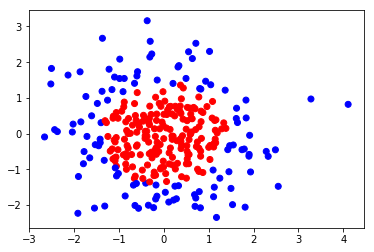

In [6]:
# 用plt.scatter画出数据集X各行中第0列元素和第1列元素的点即各行的（x0，x1），用各行Y_c对应的值表示颜色（c是color的缩写）
plt.scatter(X[:, 0], X[:, 1], c=np.squeeze(Y_c))
plt.show()   # 画出散点

After 0 steps, loss is: 2.662970
After 2000 steps, loss is: 0.703009
After 4000 steps, loss is: 0.402942
After 6000 steps, loss is: 0.265053
After 8000 steps, loss is: 0.183241
After 10000 steps, loss is: 0.129752
After 12000 steps, loss is: 0.099751
After 14000 steps, loss is: 0.084839
After 16000 steps, loss is: 0.077496
After 18000 steps, loss is: 0.074654
After 20000 steps, loss is: 0.073176
After 22000 steps, loss is: 0.072397
After 24000 steps, loss is: 0.071802
After 26000 steps, loss is: 0.071303
After 28000 steps, loss is: 0.070892
After 30000 steps, loss is: 0.070396
After 32000 steps, loss is: 0.070236
After 34000 steps, loss is: 0.070076
After 36000 steps, loss is: 0.069940
After 38000 steps, loss is: 0.069812
w1:
 [[-0.6038354  -0.5756982  -0.5325457  -1.5952913   1.6025008  -0.30744672
  -0.6995944  -0.42286244 -0.70560414 -0.82979184  0.57857347]
 [ 0.1527486  -0.26706836  0.79105216  0.06050658  0.1553877  -0.53449875
   0.9026334  -0.23762651  1.4441282   0.9903793   0

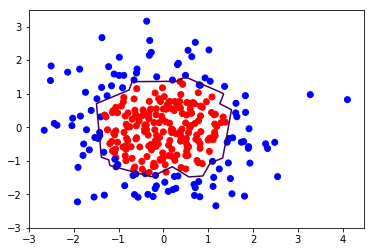

In [7]:


# 定义神经网络的输入、参数和输出，定义前向传播过程
# 生成参数的函数
def get_weight(shape,regularizer):
    w = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
    tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(regularizer)(w))
    return w

# 生成偏执b的函数
def get_bias(shape):
    b = tf.Variable(tf.constant(0.01, shape=shape))
    return b

x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))

w1 = get_weight([2, 11], 0.01)
b1 = get_bias([11])
y1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w2 = get_weight([11, 1], 0.01)
b2 = get_bias([1])
y = tf.matmul(y1, w2) + b2

# 定义损失函数
loss_mse = tf.reduce_mean(tf.square(y - y_))
# +正则化
loss_total = loss_mse + tf.add_n(tf.get_collection('losses'))



# 定义反向传播方法：不含正则化
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_mse)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 40000
    for i in range(STEPS):
        start = (i * BATCH_SIZE) % 300
        end = start + BATCH_SIZE
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y_[start:end]})
        if i % 2000 == 0:
            loss_mse_v = sess.run(loss_mse, feed_dict={x: X, y_: Y_})
            print("After %d steps, loss is: %f" % (i, loss_mse_v))
    # xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成二维网格坐标点
    xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
    # 将xx , yy拉直，并合并成一个2列的矩阵，得到一个网格坐标点的集合
    grid = np.c_[xx.ravel(), yy.ravel()]
    # 将网格坐标点喂入神经网络 ，probs为输出
    probs = sess.run(y, feed_dict={x: grid})
    # probs的shape调整成xx的样子
    probs = probs.reshape(xx.shape)
    print("w1:\n", sess.run(w1))
    print("b1:\n", sess.run(b1))
    print("w2:\n", sess.run(w2))
    print("b2:\n", sess.run(b2))

plt.scatter(X[:, 0], X[:, 1], c=np.squeeze(Y_c))
plt.contour(xx, yy, probs, levels=[.5])
plt.show()

After 0 steps, loss is: 139.144409
After 2000 steps, loss is: 0.212103
After 4000 steps, loss is: 0.240863
After 6000 steps, loss is: 0.242410
After 8000 steps, loss is: 0.242477
After 10000 steps, loss is: 0.242489
After 12000 steps, loss is: 0.242457
After 14000 steps, loss is: 0.242452
After 16000 steps, loss is: 0.242742
After 18000 steps, loss is: 0.242461
After 20000 steps, loss is: 0.242474
After 22000 steps, loss is: 0.242945
After 24000 steps, loss is: 0.242792
After 26000 steps, loss is: 0.242804
After 28000 steps, loss is: 0.242553
After 30000 steps, loss is: 0.242545
After 32000 steps, loss is: 0.242454
After 34000 steps, loss is: 0.242502
After 36000 steps, loss is: 0.242753
After 38000 steps, loss is: 0.242941
w1:
 [[ 1.04791899e-35  1.01346203e-35  1.04644259e-35 -9.92890085e-36
   9.82834888e-36  9.77408055e-36 -1.03608599e-35 -9.54188455e-36
   1.06893727e-35 -9.90138751e-36 -1.02687137e-35]
 [-1.01002329e-35 -1.05251220e-35 -1.04665295e-35 -9.62508966e-36
   1.0008291

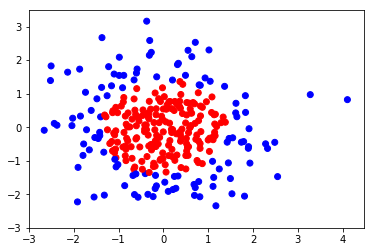

In [8]:
# 定义反向传播方法：包含正则化
train_step = tf.train.AdamOptimizer(1.0001).minimize(loss_total)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 40000
    for i in range(STEPS):
        start = (i * BATCH_SIZE) % 300
        end = start + BATCH_SIZE
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y_[start:end]})
        if i % 2000 == 0:
            loss_v = sess.run(loss_total, feed_dict={x: X, y_: Y_})
            print("After %d steps, loss is: %f" % (i, loss_v))

    xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sess.run(y, feed_dict={x: grid})
    probs = probs.reshape(xx.shape)
    print("w1:\n", sess.run(w1))
    print("b1:\n", sess.run(b1))
    print("w2:\n", sess.run(w2))
    print("b2:\n", sess.run(b2))

plt.scatter(X[:, 0], X[:, 1], c=np.squeeze(Y_c))
plt.contour(xx, yy, probs, levels=[.5])
plt.show()